In [0]:
from google.colab import drive
import numpy as np
import math
import pandas as pd
import os
import pickle 
import sklearn
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt; plt.rcdefaults()
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functio

In [0]:
drive.mount('/content/drive')
path = os.getcwd()
print(path)
merge = pd.read_csv(path + '/drive/My Drive/ML Project/Merge.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content


In [0]:
test = pd.read_csv(path + '/drive/My Drive/ML Project/Test.csv')
classifier_rf = joblib.load(path + '/drive/My Drive/ML Project/classifier_model_rf.sav')

In [0]:
prediction_rf = classifier_rf.predict(test.drop(['Origin','Dest','FlightDate','date', 'ArrDelayMinutes', 'ArrDel15','ArrTime'], axis = 1))

In [0]:
print("RandomForest: ", classification_report(test['ArrDel15'], prediction_rf))

RandomForest:                precision    recall  f1-score   support

         0.0       0.92      0.97      0.95    365677
         1.0       0.87      0.70      0.78     97182

    accuracy                           0.92    462859
   macro avg       0.90      0.84      0.86    462859
weighted avg       0.91      0.92      0.91    462859

LR:                precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    365677
         1.0       0.89      0.68      0.77     97182

    accuracy                           0.92    462859
   macro avg       0.91      0.83      0.86    462859
weighted avg       0.91      0.92      0.91    462859

ET:                precision    recall  f1-score   support

         0.0       0.92      0.94      0.93    365677
         1.0       0.76      0.71      0.74     97182

    accuracy                           0.89    462859
   macro avg       0.84      0.83      0.83    462859
weighted avg       0.89      0.89      0.89    46

In [0]:
train = pd.read_csv(path + '/drive/My Drive/ML Project/Train.csv')

In [0]:
#undersample = RandomUnderSampler(sampling_strategy='majority')

oversample = SMOTE()
train_under, train_labels = oversample.fit_resample(train.drop(['Origin','Dest','FlightDate','date', 'ArrDelayMinutes'], axis = 1), train['ArrDel15'])
train0 = pd.DataFrame(data = train_under)
train0['ArrDel15'] = train_labels
#train_under, train_labels_under = oversample.fit_resample(train.drop(['Origin','Dest','FlightDate','date', 'ArrDelayMinutes'], axis = 1), train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
test_new = test.drop(['ArrDel15', 'ArrTime'], axis = 1)
test_new['ArrDel15'] = prediction_rf
test_new = test_new[test_new['ArrDel15'] != 0]
ground_truth = test_new['ArrDelayMinutes']

In [0]:
regressor = joblib.load(path + '/drive/My Drive/ML Project/regressor_model_rf.sav')

In [0]:
delay_minutes = regressor.predict(test_new.drop(['Origin','Dest','FlightDate','date', 'ArrDel15', 'ArrDelayMinutes'], axis = 1))

In [0]:
print("RandomForest Mean Absolute Error: ", mean_absolute_error(ground_truth, delay_minutes))
print("RandomForest Mean Squared Error: ", math.sqrt(mean_squared_error(ground_truth, delay_minutes)))
df_rf = pd.DataFrame({'Actual': ground_truth, 'Predicted': delay_minutes})
print(df_rf)

RandomForest Mean Absolute Error:  14.263926975234682
RandomForest Mean Squared Error:  19.05743449871358
        Actual  Predicted
4         37.0      27.04
13        28.0      45.33
21       276.0     302.64
33        85.0      96.87
38        65.0      32.92
...        ...        ...
462821    21.0      31.93
462824    15.0      32.47
462831     1.0      30.19
462849    34.0      33.21
462853   162.0     152.20

[78095 rows x 2 columns]


In [0]:
test_sorted = test_new.sort_values(['ArrDelayMinutes'])

You now have to divide the test dataset into pieces where ArrDelayMinutes is from 0-50, 50-100, etc. then pass each and every piece into the regressor.

In [0]:
print(test_sorted['ArrDelayMinutes'])

127217       0.0
13070        0.0
281228       0.0
281223       0.0
37806        0.0
           ...  
416554    1396.0
334917    1405.0
290848    1442.0
34709     1505.0
455835    2142.0
Name: ArrDelayMinutes, Length: 78095, dtype: float64


In [0]:
lower = 15
upper = 100
mae = []
rmse = []
while(upper <= test_sorted['ArrDelayMinutes'].max()):
  print("Iteration", lower)
  test_loop = pd.DataFrame()
  test_loop = test_sorted[(test_sorted['ArrDelayMinutes'] > lower) & (test_sorted['ArrDelayMinutes'] <= upper)]
  if (test_loop.empty != True):
    delay_minutes = regressor.predict(test_loop.drop(['Origin','Dest','FlightDate','date', 'ArrDel15', 'ArrDelayMinutes'], axis = 1))
    mae.append(mean_absolute_error(test_loop['ArrDelayMinutes'], delay_minutes))
    rmse.append(math.sqrt(mean_squared_error(test_loop['ArrDelayMinutes'], delay_minutes)))
    print("Appended")
  lower = upper
  upper = upper + 100


Iteration 15
Appended
Iteration 100
Appended
Iteration 200
Appended
Iteration 300
Appended
Iteration 400
Appended
Iteration 500
Appended
Iteration 600
Appended
Iteration 700
Appended
Iteration 800
Appended
Iteration 900
Appended
Iteration 1000
Appended
Iteration 1100
Appended
Iteration 1200
Appended
Iteration 1300
Appended
Iteration 1400
Appended
Iteration 1500
Appended
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000


In [0]:
lower = 15
mae = []
rmse = []
minutes = [15,100,200,500,1000]
for upper in minutes: 
  print("Iteration", lower)
  test_loop = pd.DataFrame()
  test_loop = test_sorted[(test_sorted['ArrDelayMinutes'] > lower) & (test_sorted['ArrDelayMinutes'] <= upper)]
  if (test_loop.empty != True):
    delay_minutes = regressor.predict(test_loop.drop(['Origin','Dest','FlightDate','date', 'ArrDel15', 'ArrDelayMinutes'], axis = 1))
    mae.append(mean_absolute_error(test_loop['ArrDelayMinutes'], delay_minutes))
    rmse.append(math.sqrt(mean_squared_error(test_loop['ArrDelayMinutes'], delay_minutes)))
    print("Appended")
  lower = upper

test_loop = test_sorted[test_sorted['ArrDelayMinutes'] > 1000]
delay_minutes = regressor.predict(test_loop.drop(['Origin','Dest','FlightDate','date', 'ArrDel15', 'ArrDelayMinutes'], axis = 1))
mae.append(mean_absolute_error(test_loop['ArrDelayMinutes'], delay_minutes))
rmse.append(math.sqrt(mean_squared_error(test_loop['ArrDelayMinutes'], delay_minutes)))
print(len(mae),len(rmse))



Iteration 15
Iteration 15
Appended
Iteration 100
Appended
Iteration 200
Appended
Iteration 500
Appended
5 5


In [0]:
print(mae, rmse)

[11.23102033625387, 17.416595925297113, 19.152542082738947, 15.947572463768118, 24.286216216216207] [14.528684529198282, 25.30036458731916, 28.595156644251357, 22.011483621779885, 42.939355129285744]


In [0]:
print(len(mae))
print(lower, upper)

17
2100 2200


In [0]:
test_loop = test_sorted[(test_sorted['ArrDelayMinutes'] <= 2150) & (test_sorted['ArrDelayMinutes'] > 2000)]
delay_minutes = regressor.predict(test_loop.drop(['Origin','Dest','FlightDate','date', 'ArrDel15', 'ArrDelayMinutes'], axis = 1))
mae.append(mean_absolute_error(test_loop['ArrDelayMinutes'], delay_minutes))
rmse.append(math.sqrt(mean_squared_error(test_loop['ArrDelayMinutes'], delay_minutes)))


In [0]:
print(mae)

[12.282699296568728, 13.327944713265941, 17.08882710792067, 18.17310586913788, 19.730117164616285, 19.019334098737083, 17.808325581395348, 18.942730627306275, 19.781240875912406, 15.54404494382022, 19.59220338983051, 12.90735294117646, 16.333636363636366, 18.756944444444454, 13.786111111111122, 13.66333333333333, 13.320416666666674, 15.550416666666658, 17.24533333333333, 9.78733333333333, 21.13333333333334, 16.892000000000007, 13.414999999999964, 11.92800000000002, 19.78199999999997, 7.710000000000036, 19.470000000000027, 25.20666666666663, 40.389999999999986, 10.069999999999936, 218.06999999999994]


In [0]:
with open(path + "/drive/My Drive/ML Project/MAE.txt", "wb") as fp:  
   pickle.dump(mae, fp)
with open(path + "/drive/My Drive/ML Project/RMSE.txt", "wb") as fp:
   pickle.dump(rmse, fp)


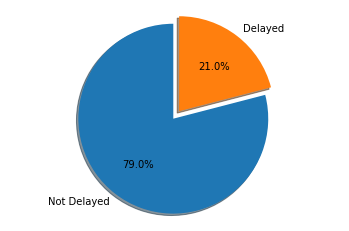

In [0]:
# Class Imbalance Pie Chart:
total = len(merge.axes[0])
explode = (0, 0.1)
sizes = [(label_0_rows/total*100),(label_1_rows/total*100)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig(path + '/drive/My Drive/ML Project/class-imbalance-train-2.png')



In [0]:
# Depicting data distribution for Regression Testing:
merge = pd.read_csv(path + "/drive/My Drive/ML Project/Test.csv")  
f,a,b,c,d,e=0,0,0,0,0,0
for i in merge['ArrDelayMinutes']:
  if((i>=0)&(i<=15)):
    f = f+1
  elif ((i>15)&(i<=100)):
    a = a + 1
  elif((i>100)&(i<=200)):
    b = b+1
  elif((i>200)&(i<=500)):
    c = c + 1
  elif((i>500)&(i<=1000)):
    d = d + 1
  elif(i>1000):
    e = e + 1
print(a+b+c+d+e+f)

462859


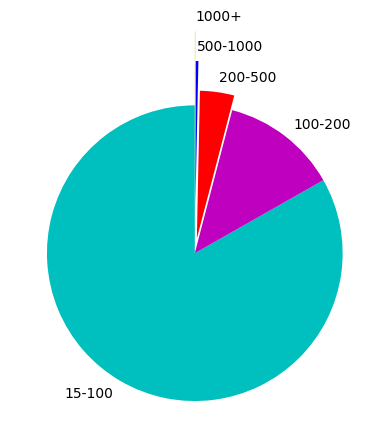

In [0]:
labels = ['15-100', '100-200', '200-500', '500-1000', '1000+']
cols = ['c','m','r','b','y']
numbers = [a,b,c,d,e]
plt.pie(numbers,m
        labels=labels,
        colors=cols,
        startangle=90,
        shadow= False,
        explode=(0,0,0.1,0.3,0.5),
        )
plt.savefig(path + "/drive/My Drive/ML Project/reg-test.png")